# <center>Classification -- Predicting Customer Churn</center>

**[1] Objective**

Customer attrition is one of the biggest expenditures of any organization. Customer churn otherwise known as customer attrition or customer turnover is the percentage of customers that stopped using your company's product or service within a specified timeframe.

In this project, we aim to find the likelihood of a customer leaving the organization, the key indicators of churn as well as the retention strategies that can be implemented to avert this problem.

**[2] Data Understanding**

The data for this project is in a csv format. The following describes the columns present in the data.

<b>Gender</b> -- Whether the customer is a male or a female

<b>SeniorCitizen</b> -- Whether a customer is a senior citizen or not

<b>Partner</b> -- Whether the customer has a partner or not (Yes, No)

<b>Dependents</b> -- Whether the customer has dependents or not (Yes, No)

<b>Tenure</b> -- Number of months the customer has stayed with the company

<b>Phone Service</b> -- Whether the customer has a phone service or not (Yes, No)

<b>MultipleLines</b> -- Whether the customer has multiple lines or not

<b>InternetService</b> -- Customer's internet service provider (DSL, Fiber Optic, No)

<b>OnlineSecurity</b> -- Whether the customer has online security or not (Yes, No, No Internet)

<b>OnlineBackup</b> -- Whether the customer has online backup or not (Yes, No, No Internet)

<b>DeviceProtection</b> -- Whether the customer has device protection or not (Yes, No, No internet service)

<b>TechSupport</b> -- Whether the customer has tech support or not (Yes, No, No internet)

<b>StreamingTV</b> -- Whether the customer has streaming TV or not (Yes, No, No internet service)

<b>StreamingMovies</b> -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

<b>Contract</b> -- The contract term of the customer (Month-to-Month, One year, Two year)

<b>PaperlessBilling</b> -- Whether the customer has paperless billing or not (Yes, No)

<b>Payment Method</b> -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

<b>MonthlyCharges</b> -- The amount charged to the customer monthly

<b>TotalCharges</b> -- The total amount charged to the customer

<b>Churn</b> -- Whether the customer churned or not (Yes or No)


**[3] Important Libraries**


The following libraries shall be used in this project:
#### 1. numpy
    - NumPy is a Python library for numerical computations. It is widely used for scientific computing, data analysis, and machine learning.
#### 2. pandas
    - Pandas is a Python library that provides data structures and tools for data manipulation and analysis. It is commonly used for data wrangling and cleaning, and exploratory data analysis.
#### 3. sklearn
    - Scikit-learn (or sklearn) is a Python library for machine learning that provides tools for classification, regression, clustering, and dimensionality reduction, as well as for evaluating and tuning models. It offers a consistent API, handles various types of input data, and integrates well with other Python libraries such as NumPy, pandas, and matplotlib.
#### 4. matplotlib
    - Matplotlib is a Python library for creating static, animated, and interactive visualizations in Python. It provides a wide variety of plotting functions for creating line plots, scatter plots, bar plots, histograms, heatmaps, and more, and allows for customization of the style, labels, and axes of plots.
#### 5. seaborn
    -Seaborn is a Python library for creating statistical visualizations built on top of Matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics such as heatmaps, scatter plots, line plots, bar plots, and distribution plots. It is commonly used for exploratory data analysis and data visualization. 

In [153]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler

# Statistic libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from scipy.stats import chi2, chi2_contingency


# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier

# Model evaluation libraries
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import cross_val_predict, cross_val_score

# Save Model for future use
import joblib

**[4] Getting the Data**
- We shall use one csv file in the data folder in this project

In [154]:
df = pd.read_csv('/media/penscola/Penscola@Tech/Projects/Code_Clause/Churn_Prediction/data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [155]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [156]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [157]:
# Get more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


**[5] Data Cleaning**

In [158]:
# See if there are any missing values in df_telco_cust
missing_values_count = df.isnull().sum()
print(missing_values_count)

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64


In [159]:
# Checking for duplicates
df.drop_duplicates(inplace=True, keep='first')
df

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,yes,yes,24,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.5,no
7039,2234-xaduh,female,0,yes,yes,72,yes,yes,fiber_optic,no,...,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.9,no
7040,4801-jzazl,female,0,yes,yes,11,no,no_phone_service,dsl,yes,...,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,8361-ltmkd,male,1,yes,no,4,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.6,yes


There are no duplicate in the dataset

In [160]:
#  the number of unique values per column
for column in df.columns:
    print(column, ":", df[column].nunique())

customerid : 7043
gender : 2
seniorcitizen : 2
partner : 2
dependents : 2
tenure : 73
phoneservice : 2
multiplelines : 3
internetservice : 3
onlinesecurity : 3
onlinebackup : 3
deviceprotection : 3
techsupport : 3
streamingtv : 3
streamingmovies : 3
contract : 3
paperlessbilling : 2
paymentmethod : 4
monthlycharges : 1585
totalcharges : 6531
churn : 2


**[6] Transformation and Feature Engineering**

In [161]:
# Check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df['totalcharges'].dtype)
print(df['monthlycharges'].dtype)

object
float64


In [162]:
# Check for non-numeric values by checking for NaN values in the column
has_non_numeric_values = df['totalcharges'].isnull().any()

if has_non_numeric_values:
    print("There are non-numeric values in the 'TotalCharges' column.")
else:
    print("All values in the 'TotalCharges' column are numeric.")

All values in the 'TotalCharges' column are numeric.


In [163]:
# Transform the TotalCharges column from object to float 
# Convert 'TotalCharges' to numeric type
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

# # Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df['totalcharges'] = imputer.fit_transform(df[['totalcharges']])

In [164]:
# Again check the data type of the TotalCharges column in the df_telco_cust dataframe
print(df['totalcharges'].dtype)

float64


**[7] EDA** 

**[7.1] Univeriate Analysis**

**[7.1.1] Gender**

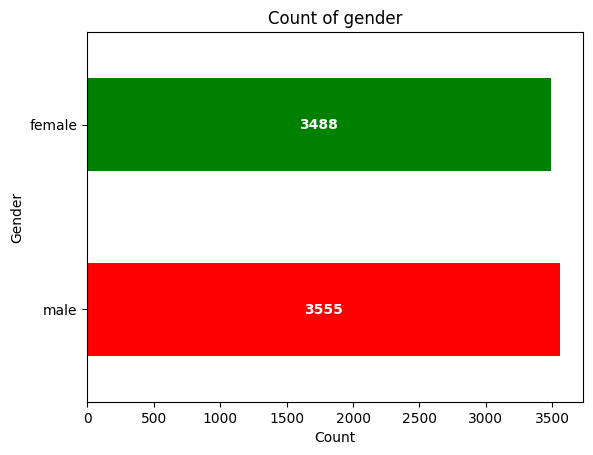

<Figure size 600x400 with 0 Axes>

In [165]:
# counts the number of occurrences of each gender in the 'gender' column of the 
gender_count = df['gender'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'green']

# This line creates the horizontal bar chart using the plot() function of the gender_count object
ax = gender_count.plot(kind='barh', color=colors)


# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(gender_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.figure(figsize=(6,4))

plt.show()

From the above chart males and females are almost evenly distributed in the dataset

**[7.1.2] Senior Citizens**

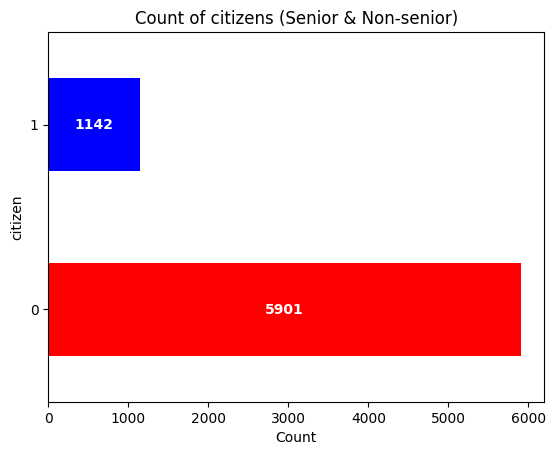

<Figure size 600x400 with 0 Axes>

In [166]:
# This code will plot a horizontal bar chart showing the count of senior and non-senior citizens 
citizen_count = df['seniorcitizen'].value_counts()

# list of colors to be used in the bar chart.
colors = ['red', 'blue']

# This line creates the horizontal bar chart using the plot() function of the citizen_count object
ax = citizen_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(citizen_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')
    
# Adding label, title and size
plt.title('Count of citizens (Senior & Non-senior)')
plt.xlabel('Count')
plt.ylabel('citizen')
plt.figure(figsize=(6,4))

plt.show()

We see that the ration of senior citizens to non-senior citizens is 1:5

**[7.1.3] Tenure**

<Axes: xlabel='tenure', ylabel='Count'>

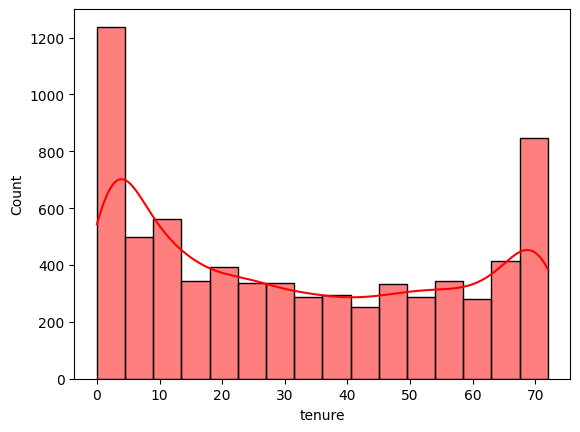

In [167]:
# creates a histogram plot using the Seaborn library in Python.
sns.histplot(df['tenure'], kde=True, color='red')

From the graph, we visualize that there is almost a uniform distribution of Tenure between 10 to 65 months at about 400 customers each and a peek of slightly above 1200 customers with a Tenure 0-5 months and a gain a peek of about 800 customers with a Tenure of 70 and above months.

**[7.1.4] Streaming movies**

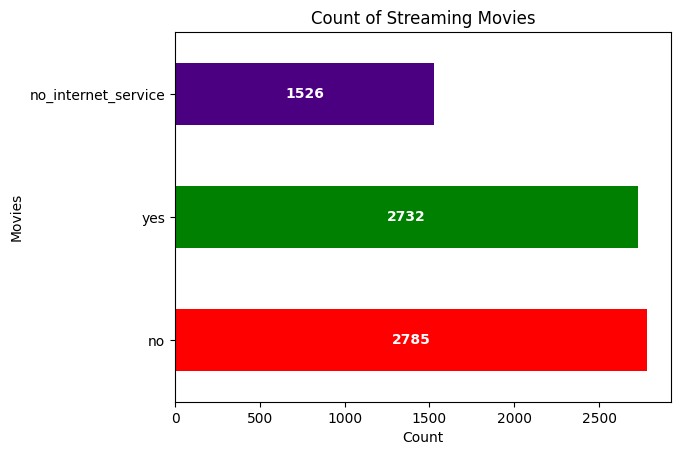

<Figure size 600x400 with 0 Axes>

In [168]:
# First, we obtain a count of the different values in the 'StreamingMovies' 
# column of a Pandas DataFrame named 'df_telco_cust'
S_movie_count = df['streamingmovies'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green', 'indigo']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 'barh' for horizontal bars,
# and the color parameter set to the list of colors we defined earlier
ax = S_movie_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(S_movie_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Streaming Movies')
plt.xlabel('Count')
plt.ylabel('Movies')
plt.figure(figsize=(6,4))

plt.show()

Customers who have streaming movies connections are 2732 and those without are 2785 (only a difference of 53 between the two) with those with no Internet being only 1526.

**[7.1.5] MultipleLines**

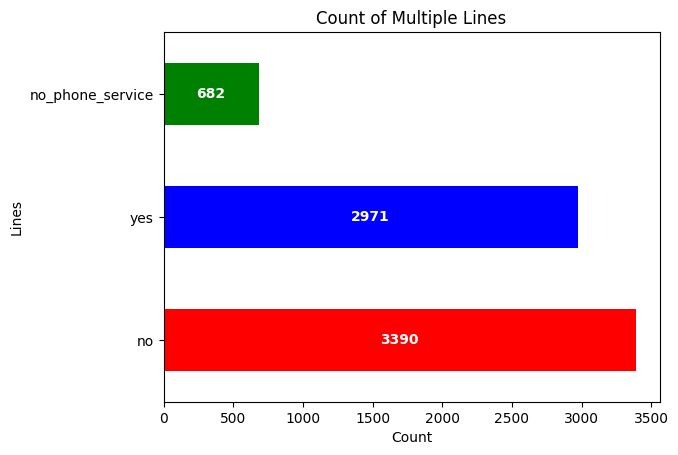

<Figure size 600x400 with 0 Axes>

In [169]:
# First, we obtain a count of the different values in the 'MultipleLines' 
# column of a Pandas DataFrame named 'df_telco_cust'
Multi_count = df['multiplelines'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars,and the color parameter set to the list of colors we defined earlier
ax = Multi_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Multi_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Multiple Lines')
plt.xlabel('Count')
plt.ylabel('Lines')
plt.figure(figsize=(6,4))

plt.show()

The bar graph shows the distribution of customers with or without Multiplelines as follows: No Multiple lines: 48%, With Multiplelines: 42% and  those with no phone services: 10%.

**[7.1.6] Online Security**

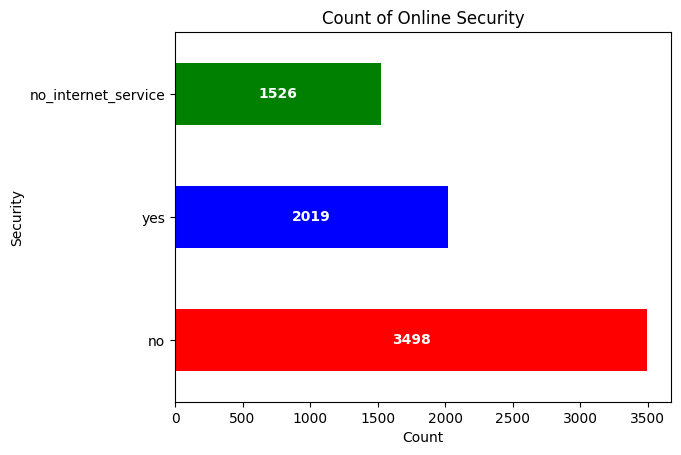

<Figure size 600x400 with 0 Axes>

In [170]:
# First, we obtain a count of the different values in the 'OnlineSecurity' 
# column of a Pandas DataFrame named 'df_telco_cust'
Security_count = df['onlinesecurity'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'blue', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter 
# set to 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = Security_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(Security_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Online Security')
plt.xlabel('Count')
plt.ylabel('Security')
plt.figure(figsize=(6,4))

plt.show()

The graph shows that customers without Online Security constitute around 50% followed by those with online security at 29% and the rest have no Internet service.

**[7.1.7] Partner**

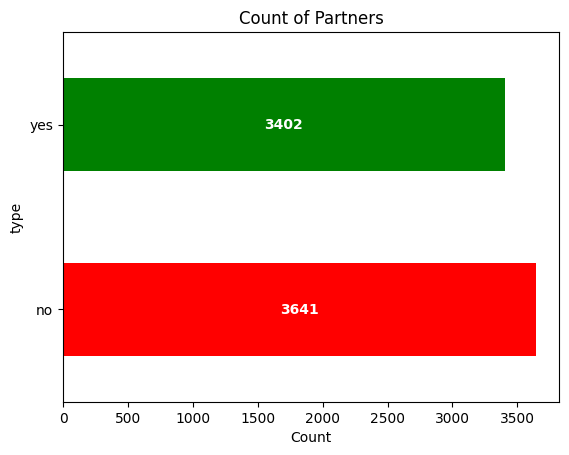

<Figure size 600x400 with 0 Axes>

In [171]:
# First, we obtain a count of the different values in the 'Partner' 
# column of a Pandas DataFrame named 'df_telco_cust'
partner_count = df['partner'].value_counts()

# Next, we define a list of colors for the bars in the horizontal bar chart
colors = ['red', 'green']

# We create the horizontal bar chart using the Pandas plot() method, with the kind parameter set to 
# 'barh' for horizontal bars, and the color parameter set to the list of colors we defined earlier
ax = partner_count.plot(kind='barh', color=colors)

# Loop through the bars and annotate the actual count in the center of each bar
for i, v in enumerate(partner_count):
    ax.text(v/2, i, str(v), color='white', fontweight='bold', ha='center', va='center')

# Adding label, title and size
plt.title('Count of Partners')
plt.xlabel('Count')
plt.ylabel('type')
plt.figure(figsize=(6,4))

plt.show()

Customers without partners make the majority at around 52% and those with parners at 48%.

**[8] Bivariate and Multivariate Analysis**

**[8.1] Bivariate Analysis**

**[8.1.1] Gender vs Churn**

In [172]:
# Create a pivot table of contracts counts by gender and churn
pivot_table = pd.pivot_table(df, values = ['contract'], index=['gender'], 
                             columns=['churn'], aggfunc='count')

# Print the pivot table
print(pivot_table)

       contract     
churn        no  yes
gender              
female     2549  939
male       2625  930


**[8.1.2] SeniorCitizens vs Churn**

<Axes: xlabel='seniorcitizen', ylabel='churn'>

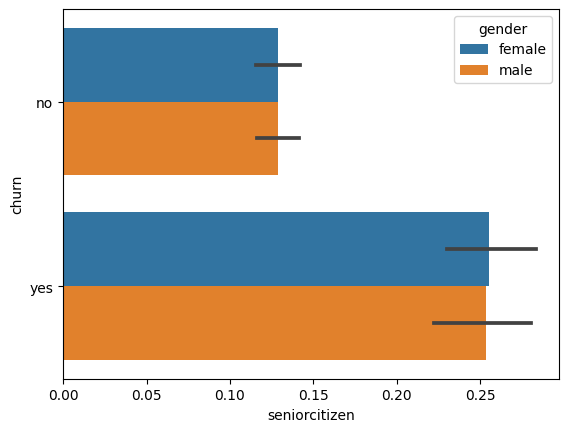

In [173]:
sns.barplot(data=df, x='seniorcitizen', y='churn', hue='gender')

The graph shows that many senior citizens churn and the distribution is uniform between male and female.

**[8.1.3] Partner vs Churn**

<Axes: xlabel='partner', ylabel='count'>

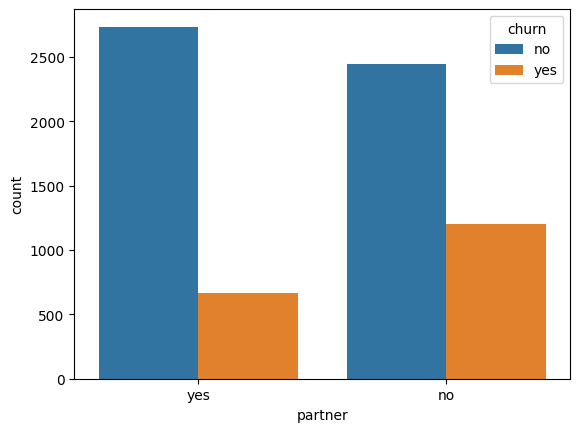

In [174]:
sns.countplot(data=df, x='partner', hue='churn')

Those without partners tend to churn more than those with partners.

**[8.1.4] Dependent vs Churn**

<Axes: xlabel='dependents', ylabel='count'>

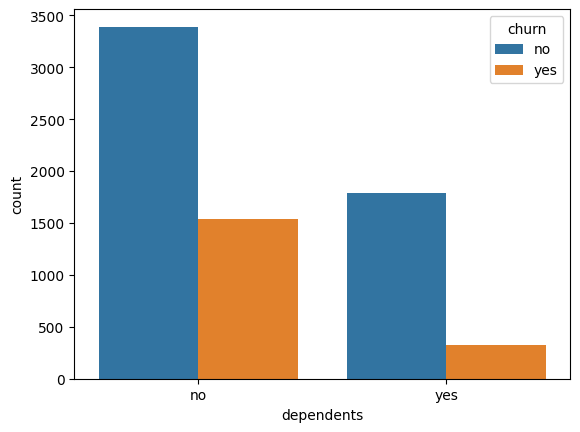

In [175]:
sns.countplot(x='dependents', hue='churn', data=df)

Those without dependents tend to churn more than those with dependents.

**[8.1.5] MonthlyCharges vs Churn**

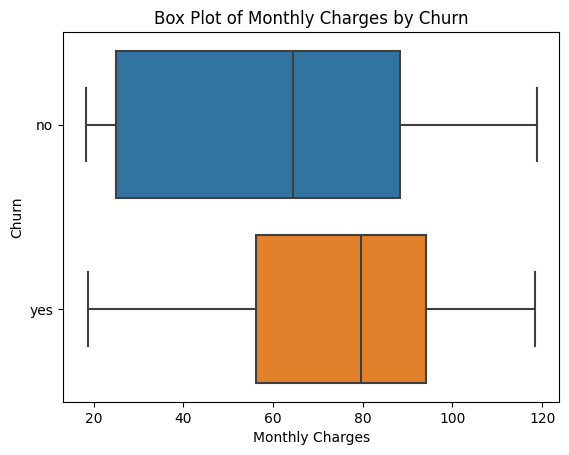

In [176]:
# create a box plot using boxplot() function
sns.boxplot(x="monthlycharges", y="churn", data=df)

# set x-axis and y-axis labels and plot title
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Monthly Charges by Churn")

# display the plot
plt.show()

- By looking at the box plot, we can see that there are significant differences in the distribution of monthly charges for customers who churned compared to those who did not churn. 
    1. The median for those who don't churn is about 62 with 1st quartile of about 25 and 3rd quartile of about 90.
    2. The median for those who churn is about 80 with 1st quartile of about 55 and 3rd quartile of about 95.

**[8.1.6] TotalCharges vs Churn**

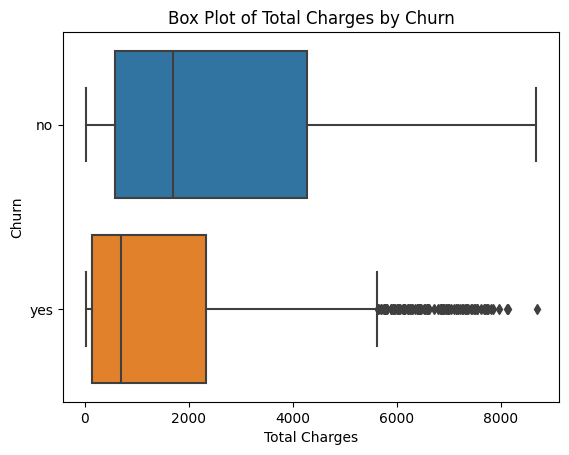

In [177]:
# create a box plot using boxplot() function
sns.boxplot(x="totalcharges", y="churn", data=df)

# set x-axis and y-axis labels and plot title
plt.xlabel("Total Charges")
plt.ylabel("Churn")
plt.title("Box Plot of Total Charges by Churn")

# display the plot
plt.show()

Customers who tend to churn have their median Total Charges of about 500 but with several outliers beyond 5000.

**[8.1.7] Internet Service vs Churn**

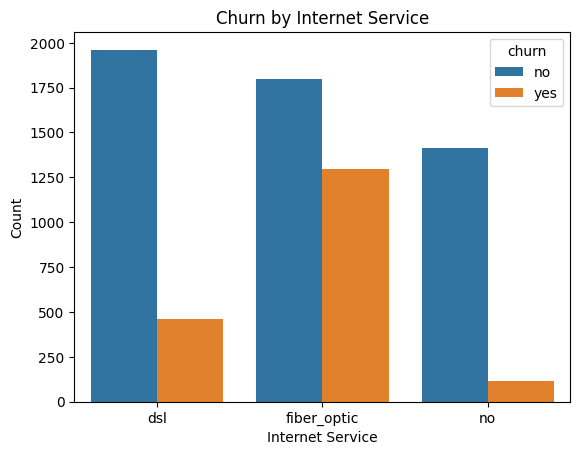

In [178]:
sns.countplot(data=df, x='internetservice', hue='churn')
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.title("Churn by Internet Service")
plt.show()

It appears that those who churn most are those with Fiber optic Internet Service.

**[8.1.8] PaymentMethod vs Churn**

<Figure size 1600x1400 with 0 Axes>

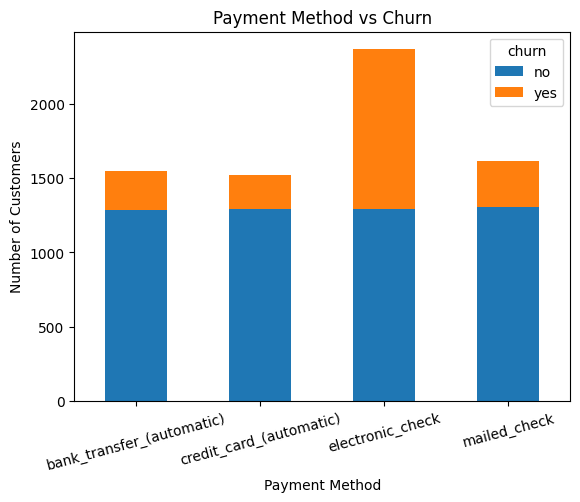

In [179]:
# create a contingency table of PaymentMethod and Churn
payment_churn_table = pd.crosstab(df['paymentmethod'], df['churn'])

plt.figure(figsize=(16,14))
# create a stacked bar plot
payment_churn_table.plot(kind='bar', stacked=True)

# set plot title and axis labels
plt.title('Payment Method vs Churn')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')

plt.xticks(rotation=15)

# display the plot
plt.show()

From the stack-bar chart it appears that those who churn most are those with Electronic check as a Payment Method.

**[8.2] Multivariate Analysis**

**[8.2.1] Churn rate and risk ratio**

In [180]:
df_copy = df.copy()

In [181]:
df_copy.churn = (df.churn == 'yes').astype(int)

In [182]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [183]:
global_churn = df_copy.churn.mean()
global_churn

0.2653698707936959

In [184]:
for c in categorical:
    print(c)
    df_group = df_copy.groupby(c).churn.agg(['mean', 'count'])
    df_group['deff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,deff,risk
gender,,,,
female,0.269209,3488,0.003839,1.014466
male,0.261603,3555,-0.003766,0.985807




seniorcitizen


,mean,count,deff,risk
seniorcitizen,,,,
0,0.236062,5901,-0.029308,0.889557
1,0.416813,1142,0.151443,1.570686




partner


,mean,count,deff,risk
partner,,,,
no,0.329580,3641,0.064210,1.241964
yes,0.196649,3402,-0.068721,0.741038




dependents


,mean,count,deff,risk
dependents,,,,
no,0.312791,4933,0.047422,1.178700
yes,0.154502,2110,-0.110868,0.582215




phoneservice


,mean,count,deff,risk
phoneservice,,,,
no,0.249267,682,-0.016103,0.939319
yes,0.267096,6361,0.001726,1.006506




multiplelines


,mean,count,deff,risk
multiplelines,,,,
no,0.250442,3390,-0.014927,0.943749
no_phone_service,0.249267,682,-0.016103,0.939319
yes,0.286099,2971,0.020729,1.078114




internetservice


,mean,count,deff,risk
internetservice,,,,
dsl,0.189591,2421,-0.075779,0.714441
fiber_optic,0.418928,3096,0.153558,1.578656
no,0.074050,1526,-0.191320,0.279044




onlinesecurity


,mean,count,deff,risk
onlinesecurity,,,,
no,0.417667,3498,0.152297,1.573906
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.146112,2019,-0.119258,0.550597




onlinebackup


,mean,count,deff,risk
onlinebackup,,,,
no,0.399288,3088,0.133918,1.504645
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.215315,2429,-0.050055,0.811377




deviceprotection


,mean,count,deff,risk
deviceprotection,,,,
no,0.391276,3095,0.125906,1.474456
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.225021,2422,-0.040349,0.847951




techsupport


,mean,count,deff,risk
techsupport,,,,
no,0.416355,3473,0.150985,1.568960
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.151663,2044,-0.113706,0.571517




streamingtv


,mean,count,deff,risk
streamingtv,,,,
no,0.335231,2810,0.069861,1.263261
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.300702,2707,0.035332,1.133143




streamingmovies


,mean,count,deff,risk
streamingmovies,,,,
no,0.336804,2785,0.071434,1.269188
no_internet_service,0.074050,1526,-0.191320,0.279044
yes,0.299414,2732,0.034044,1.128291




contract


,mean,count,deff,risk
contract,,,,
month-to-month,0.427097,3875,0.161727,1.609440
one_year,0.112695,1473,-0.152675,0.424672
two_year,0.028319,1695,-0.237051,0.106714




paperlessbilling


,mean,count,deff,risk
paperlessbilling,,,,
no,0.163301,2872,-0.102069,0.615371
yes,0.335651,4171,0.070281,1.264842




paymentmethod


,mean,count,deff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.167098,1544,-0.098271,0.629681
credit_card_(automatic),0.152431,1522,-0.112939,0.574410
electronic_check,0.452854,2365,0.187484,1.706502
mailed_check,0.191067,1612,-0.074303,0.720003


**[8.2.2] Mutual Information**

In [185]:
df_copy[numerical].corrwith(df_copy.churn).abs()

tenure            0.352229
monthlycharges    0.193356
totalcharges      0.199428
dtype: float64

**[8.2.3] Scatter Matrix**

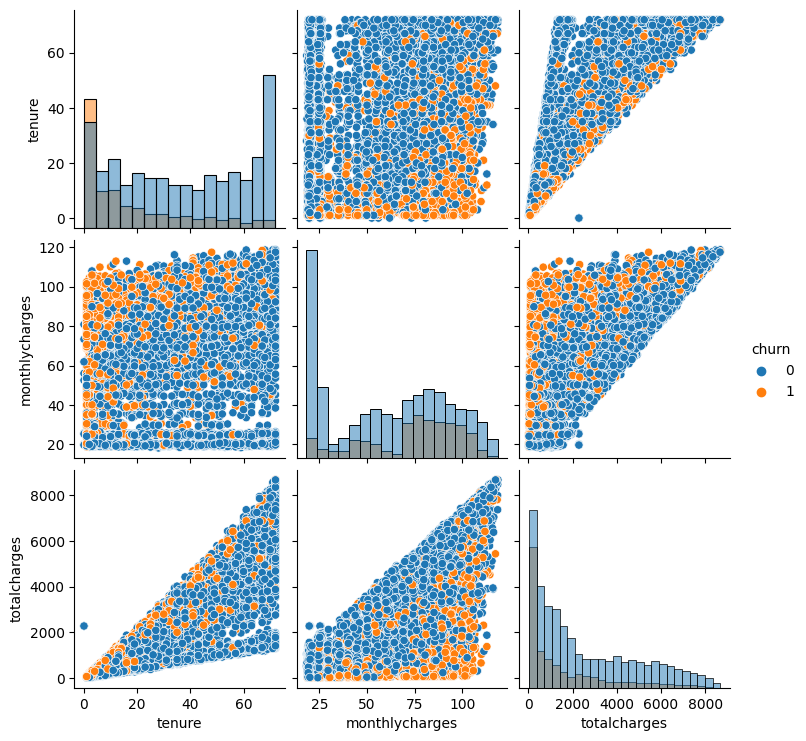

In [186]:
# select columns to include in the scatter plot matrix
cols = ['tenure', 'monthlycharges', 'totalcharges', 'churn']

# create scatter plot matrix using pairplot() function
sns.pairplot(df_copy[cols], hue='churn', diag_kind='hist')

# display the plot
plt.show()

From the Scatter Maatrix:
- Those with less than 40 months and MonthlyCharges above 80 tend to churn a lot.
- Those with MonthlyCharges in excess of 75 and TotalCharges below 4000 tend to churn more.
- And that tenure and TotalCharges have positive correlation

**[9] Building of Machine Learning Models**

In [187]:
# Drop customerID from the dataset
df.drop('customerid', axis=1, inplace=True)

# Verify that the 'customerID' column has been dropped
df

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,0,yes,yes,24,yes,yes,dsl,yes,no,yes,yes,yes,yes,one_year,yes,mailed_check,84.80,1990.50,no
7039,female,0,yes,yes,72,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,yes,credit_card_(automatic),103.20,7362.90,no
7040,female,0,yes,yes,11,no,no_phone_service,dsl,yes,no,no,no,no,no,month-to-month,yes,electronic_check,29.60,346.45,no
7041,male,1,yes,no,4,yes,yes,fiber_optic,no,no,no,no,no,no,month-to-month,yes,mailed_check,74.40,306.60,yes


**Feature Encoding and Engineering**

In [188]:
#extract the target
y=df["churn"]

#drop the target to extract features
x=df.drop("churn",axis='columns')

#check the shape
print(f"shape of target {y.shape},\n shape of features {x.shape}")

shape of target (7043,),
 shape of features (7043, 19)


**Split the dataset into training, evaluation, and test sets**

In [189]:
#split the dataset into Train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#split the training size into train and eval
x_train,x_eval,y_train,y_eval=train_test_split(x_train,y_train,test_size=0.25,random_state=42)

**Building the pipeline**

In [190]:
#check and store numeric columns
num_cols=list(set(x.select_dtypes('number')))
num_cols

['monthlycharges', 'seniorcitizen', 'totalcharges', 'tenure']

In [191]:
#check and store cat columns
cat_cols=list(set(x.select_dtypes('object')))
cat_cols

['streamingmovies',
 'streamingtv',
 'paperlessbilling',
 'onlinebackup',
 'deviceprotection',
 'phoneservice',
 'paymentmethod',
 'dependents',
 'gender',
 'contract',
 'partner',
 'techsupport',
 'multiplelines',
 'internetservice',
 'onlinesecurity']

In [192]:
#Create a cat pipline
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_pipe = Pipeline([('imputer', cat_imputer), ('enc', OneHotEncoder())])


#Create num_pipeline
num_pipe=Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

In [193]:
#create a columntransformer
preprocessor = ColumnTransformer([('numeric', num_pipe, num_cols), ('categoric', cat_pipe, cat_cols)])

In [194]:
#Create a full pipelin / end2end pipline

end2end=Pipeline([('Preprocessor',preprocessor),('model',None)])
end2end

Pipeline(steps=[('Preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['monthlycharges',
                                                   'seniorcitizen',
                                                   'totalcharges', 'tenure']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   OneHotEncoder())]),
                                                  ['streamingmovies',
                                                   'streamingtv',
                                                   'paperlessbilling',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'phoneservice',
                                                   'paymentmethod',
                                                   'dependents', 'gender',
                                                   'contract', 'partner',
                                                   'techsupport',
                                                   'multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity'])])),
                ('model', None)])

In [195]:
x_train.shape, y_train.shape, x_eval.shape, y_eval.shape

((4225, 19), (4225,), (1409, 19), (1409,))

In [196]:
y_train.head()

6157    yes
817      no
6977     no
1932     no
4168     no
Name: churn, dtype: object

In [197]:
y_eval.head()

3575     no
4958     no
1447    yes
3334    yes
4041     no
Name: churn, dtype: object

**[12] Machine Learning Models to train:**

We shall train 8 Classification Models below and pick the 3 best performing models for further tuning:
1. Logistic Regression
2. K-Nearest Neighbors
3. Decision Tree
4. Support Vector Machine (Linear Kernel)
5. Support Vector Machine (RBF Kernel)
6. Neural Network
7. Random Forest
8. Gradient Boosting

In [201]:
#Create A function to Evaluate the models
def evaluate(actual,predicted,model_name):
    PrecisionScore = precision_score(actual,predicted,pos_label='yes')
    RecallScore =   recall_score(actual,predicted,pos_label='yes')
    F1_score =     f1_score(actual,predicted,pos_label='yes')
    Accuracy =    accuracy_score(actual,predicted)

    result={'Model':model_name, 'Precision_Score':PrecisionScore,'Recall_Score':RecallScore,
            'F1_Score':F1_score,'Accuracy':Accuracy}
  
    return result

In [202]:
#This variable will hold the list of dictionaries of the results of the different models
dict_list=[]

models = {'Logistic Regression': LogisticRegression(),
         'K-Nearest Neighbors': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Support Vector Machine (Linear Kernel)': LinearSVC(),
         'Support Vector Machine (RBF Kernel)': SVC(),
         'Neural Network': MLPClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting':GradientBoostingClassifier()
         }


#Train all the models Using a for loop

for model_name , model in models.items():

    #fit data to the pipeline
    end2end_pipeline=Pipeline([('Preprocessor',preprocessor),('model',model)])
    end2end_pipeline.fit(x_train,y_train)
    #make predictions
    y_pred= end2end_pipeline.predict(x_eval)

    #evaluate the model using the evaluate function
    eval=evaluate(y_eval,y_pred,model_name)
    dict_list.append(eval)


#Put models results in a dataframe
df_results=pd.DataFrame(dict_list)

In [203]:
#sort the results by F1 score
df_results.sort_values(by='F1_Score',ascending=False,inplace=True,ignore_index=True)
#display results
df_results

,Model,Precision_Score,Recall_Score,F1_Score,Accuracy
0,Logistic Regression,0.666667,0.538259,0.595620,0.803407
1,Support Vector Machine (Linear Kernel),0.675676,0.527704,0.592593,0.804826
2,K-Nearest Neighbors,0.587744,0.556728,0.571816,0.775727
3,Gradient Boosting,0.649832,0.509235,0.571006,0.794180
4,Neural Network,0.592814,0.522427,0.555400,0.775018
5,Random Forest,0.647887,0.485488,0.555053,0.790632
6,Support Vector Machine (RBF Kernel),0.684000,0.451187,0.543720,0.796309
7,Decision Tree,0.509091,0.517150,0.513089,0.735983


**Visualization of the Metrics**

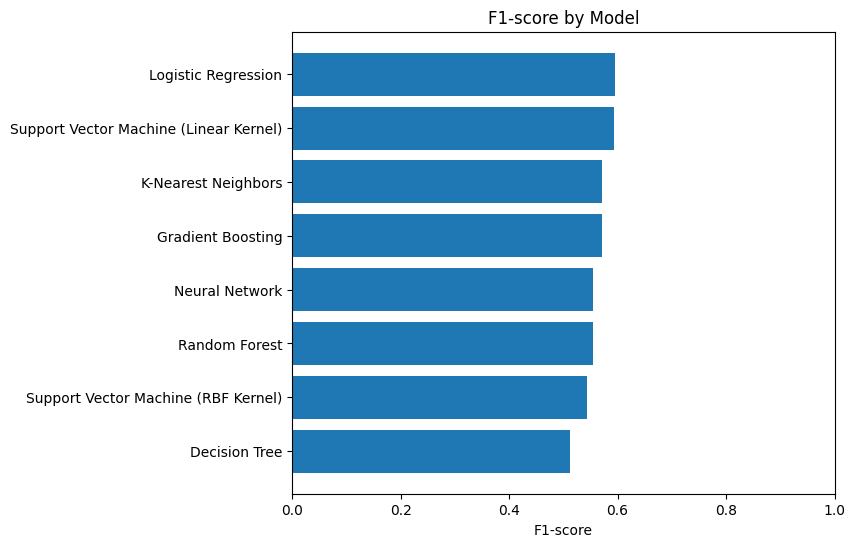

In [204]:
def visualize_results(df_results,sort,model):
    # Sort the DataFrame by the highest score in descending order for each metric
    df_results_sorted = df_results.sort_values(by=sort, ascending=False)[::-1]

    plt.figure(figsize=(7, 6))

    # Plot the F1-score (macro)
    plt.barh(df_results_sorted[model], df_results_sorted[sort])
    plt.xlim(0.0, 1.0)  # Set the x-axis limits
    plt.xlabel('F1-score')
    plt.title('F1-score by Model')

    plt.show()

    

    
# Call the visualize_results function
visualize_results(df_results,'F1_Score','Model')

**Hyperparameter Tuning for the top Four chosen Models using GridSearchCV**

In [205]:
# Set up the parameter grid for each model
gradient_boosting_params = {
    'model__learning_rate': [0.1, 0.01],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 4, 5]
}

logistic_regression_params = {
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'saga']
}

svm_params = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear']
}

neural_network_params = {
    'model__hidden_layer_sizes': [(100,), (100, 50)],
    'model__activation': ['relu', 'tanh'],
    'model__alpha': [0.0001, 0.001]
}

# Perform hyperparameter tuning with cross-validation for each model
models = {
    'Gradient Boosting': (GradientBoostingClassifier(), gradient_boosting_params),
    'Logistic Regression': (LogisticRegression(), logistic_regression_params),
    'Support Vector Machine (Linear Kernel)': (SVC(), svm_params),
    'Neural Network': (MLPClassifier(), neural_network_params)
}
best_score=[]
for model_name, (model, params) in models.items():
    #make a pipeline 
    pipe=Pipeline([('Preprocessor',preprocessor),('model',model)])
    grid_search = GridSearchCV(pipe, params, cv=5, scoring=['accuracy', 'f1_macro'], refit='f1_macro' , n_jobs=-1)
    #fit gridsearch
    grid_search.fit(x_train, y_train)

    #Print Best parameters
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    

    #Put scores in a dict
    scores={'model':model_name,'F1_score':grid_search.cv_results_['mean_test_f1_macro'][grid_search.best_index_],'Accuracy':grid_search.cv_results_['mean_test_accuracy'][grid_search.best_index_]}
    best_score.append(scores)

#Put scores in a dataframe
print('=========================================')
scores_df=pd.DataFrame(best_score)
scores_df

Best parameters for Gradient Boosting:
{'model__learning_rate': 0.01, 'model__max_depth': 4, 'model__n_estimators': 300}


/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/linear_mode

Best parameters for Logistic Regression:
{'model__C': 0.1, 'model__solver': 'saga'}
Best parameters for Support Vector Machine (Linear Kernel):
{'model__C': 10, 'model__kernel': 'linear'}


/home/penscola/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penscola/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/penscola/.local/lib/python3.10/sit

Best parameters for Neural Network:
{'model__activation': 'tanh', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (100,)}


,model,F1_score,Accuracy
0,Gradient Boosting,0.721610,0.803787
1,Logistic Regression,0.726787,0.800947
2,Support Vector Machine (Linear Kernel),0.723867,0.796686
3,Neural Network,0.714247,0.787219


In [206]:
#sort Dataframe
scores_df.sort_values(by='F1_score',ignore_index=True,ascending=False, inplace=True)
scores_df

,model,F1_score,Accuracy
0,Logistic Regression,0.726787,0.800947
1,Support Vector Machine (Linear Kernel),0.723867,0.796686
2,Gradient Boosting,0.721610,0.803787
3,Neural Network,0.714247,0.787219


**Logistic Regression as the Model of choice**

In [207]:
# Create and fit the Logistic Regression model with specified hyperparameters
logistic_regression = LogisticRegression(C=10, solver='liblinear')
pipe=Pipeline([('preprocessor',preprocessor),('model',logistic_regression)])

#fit pipeline
pipe.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['monthlycharges',
                                                   'seniorcitizen',
                                                   'totalcharges', 'tenure']),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('enc',
                                                                   OneHotEncoder())]),
                                                  ['streamingmovies',
                                                   'streamingtv',
                                                   'paperlessbilling',
                                                   'onlinebackup',
                                                   'deviceprotection',
                                                   'phoneservice',
                                                   'paymentmethod',
                                                   'dependents', 'gender',
                                                   'contract', 'partner',
                                                   'techsupport',
                                                   'multiplelines',
                                                   'internetservice',
                                                   'onlinesecurity'])])),
                ('model', LogisticRegression(C=10, solver='liblinear'))])

In [208]:
# Extract the coefficients from the Logistic Regression model
coefficients = logistic_regression.coef_[0]

# Get the feature names from your dataset
feature_names = x.columns  # 'X' contains the input features the DataFrame

# Create a dictionary to store feature coefficients
feature_coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the feature coefficients in descending order of absolute magnitude
#sorted_coefficients = sorted(feature_coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

coef=pd.DataFrame([feature_coefficients_dict])
coef

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,-1.324863,0.055084,0.578662,-1.316132,-0.328923,-0.463789,0.393706,-0.25588,-0.463789,0.320663,-0.377626,-0.02138,-0.001951,-0.463789,0.066734,-0.05078,-0.463789,0.115562,-0.30836


**Predictions from the Logistic Regression Model**

In [211]:
# Predict the y_eval values using the trained Logistic Regression model
y_pred = pipe.predict(x_test)

**Compare Actual values vs Predicted values**

In [212]:
# Create a DataFrame of y_test and y_pred
df_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

# Print the DataFrame
df_results

,y_test,y_pred
185,yes,yes
2715,no,no
3825,no,no
1807,yes,yes
132,no,no
...,...,...
6366,no,no
315,no,no
2439,no,no
5002,no,no


**Save Trained Logistic Regression Model for the future  using the joblib module**

In [213]:
#model to save 
end2end_pipeline=Pipeline([('preprocessor',preprocessor),('model',LogisticRegression(C=10, solver='liblinear'))])

# Save the trained model to a file
joblib.dump(end2end_pipeline, '/media/penscola/Penscola@Tech/Projects/Code_Clause/Churn_Prediction/model/logistic_regression_model.pkl')

# # Load the saved model from the file
# loaded_model = joblib.load('logistic_regression_model.pkl')

['/media/penscola/Penscola@Tech/Projects/Code_Clause/Churn_Prediction/model/logistic_regression_model.pkl']